True
../PickleFiles/SimulationInfo.MerianSIDM.pickle
{'r634.romulus25si2s50v35': {'path': '/data/akaxia/rzooms/r634.romulus25si2s50v35.3072g1HsbBH/r634.romulus25si2s50v35.3072g1HsbBH.004096', 'halos': [1], 'goodhalos': [1]}, 'r492.romulus25si2s50v35': {'path': '/data/akaxia/rzooms/r492.romulus25si2s50v35.3072g1HsbBH/r492.romulus25si2s50v35.3072g1HsbBH.004096', 'halos': [1], 'goodhalos': [1]}, 'r468.romulus25si2s50v35': {'path': '/data/akaxia/rzooms/r468.romulus25si2s50v35.3072g1HsbBH/r468.romulus25si2s50v35.3072g1HsbBH.004096', 'halos': [1], 'goodhalos': [1]}, 'r488.romulus25si2s50v35': {'path': '/data/akaxia/rzooms/r488.romulus25si2s50v35.3072g1HsbBH/r488.romulus25si2s50v35.3072g1HsbBH.004096', 'halos': [1], 'goodhalos': [1]}, 'r544.romulus25si2s50v35': {'path': '/data/akaxia/rzooms/r544.romulus25si2s50v35.3072g1HsbBH/r544.romulus25si2s50v35.3072g1HsbBH.004096', 'halos': [1], 'goodhalos': [1]}, 'r597.romulus25si2s50v35': {'path': '/data/akaxia/rzooms/r597.romulus25si2s50v35.3072g1HsbB

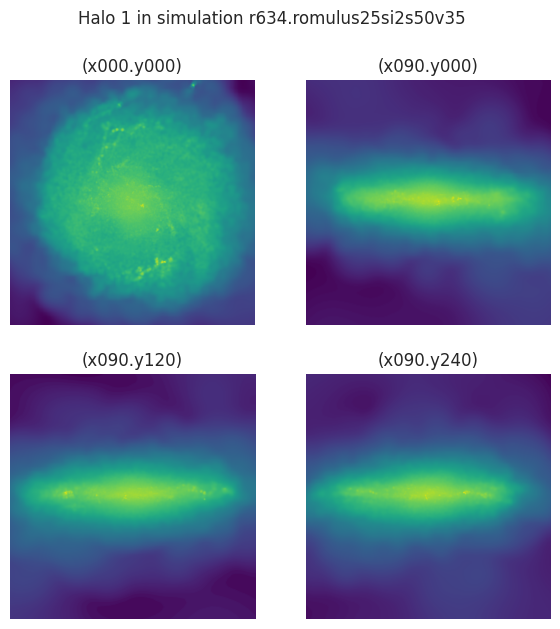

Processing simulation: r492.romulus25si2s50v35
Stellar b/a: 0.9, c/a: 0.2
jz/jcirc: 0.24, jcrit: 0.14027729630470276, dt_star: 0.00, dt_gas: 0.63, dt_total: 0.62
8.925824846845375


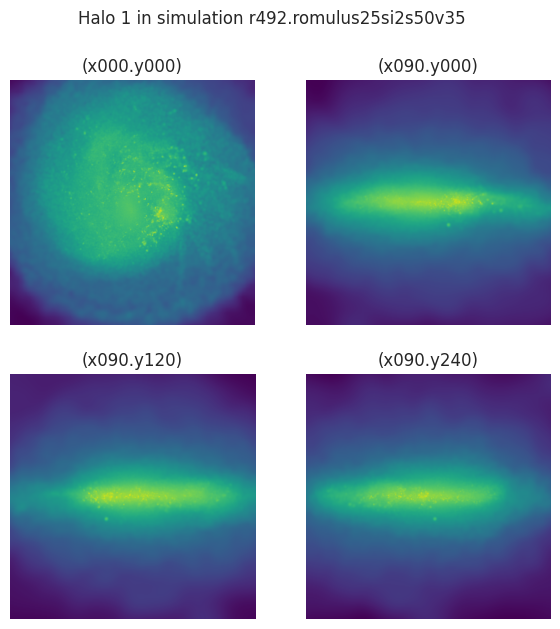

Processing simulation: r468.romulus25si2s50v35
Stellar b/a: 0.8, c/a: 0.5
jz/jcirc: 0.12, jcrit: 0.3604237735271454, dt_star: 0.01, dt_gas: 0.08, dt_total: 0.10
9.278329928320359


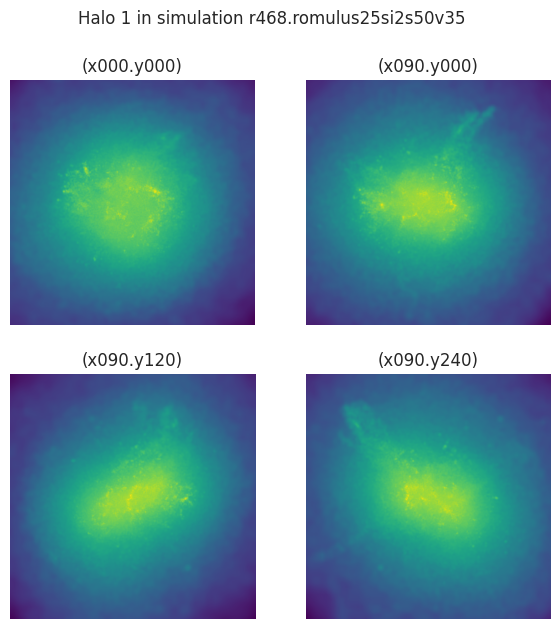

Processing simulation: r488.romulus25si2s50v35
Stellar b/a: 0.7, c/a: 0.4
jz/jcirc: 0.25, jcrit: 0.2581383287906647, dt_star: 0.03, dt_gas: 0.44, dt_total: 0.44
9.252565251412822


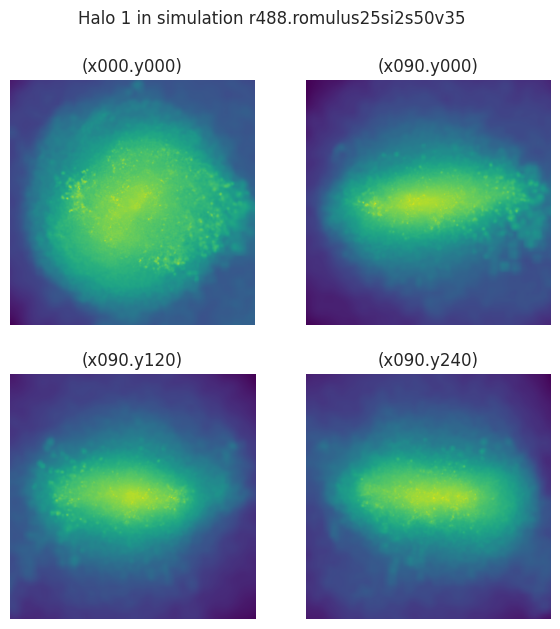

Processing simulation: r544.romulus25si2s50v35
Stellar b/a: 0.7, c/a: 0.2
jz/jcirc: 0.34, jcrit: 0.19722029566764832, dt_star: 0.09, dt_gas: 0.51, dt_total: 0.53
8.855602594799468


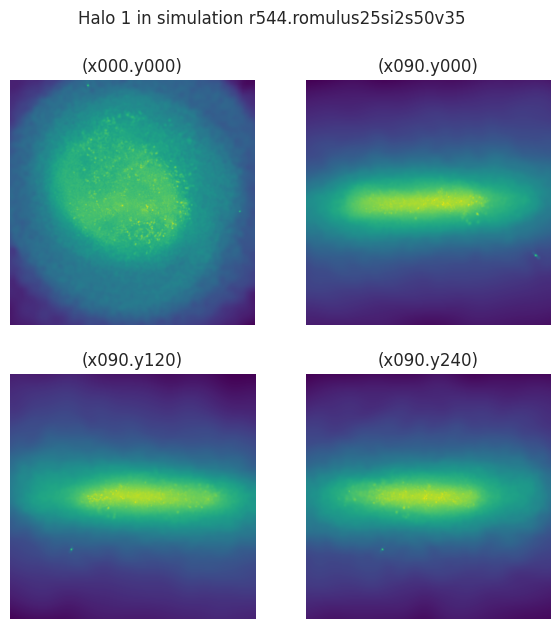

Processing simulation: r597.romulus25si2s50v35
Stellar b/a: 0.7, c/a: 0.3
jz/jcirc: 0.19, jcrit: 0.40787771344184875, dt_star: 0.11, dt_gas: 0.43, dt_total: 0.41
8.766067267927829


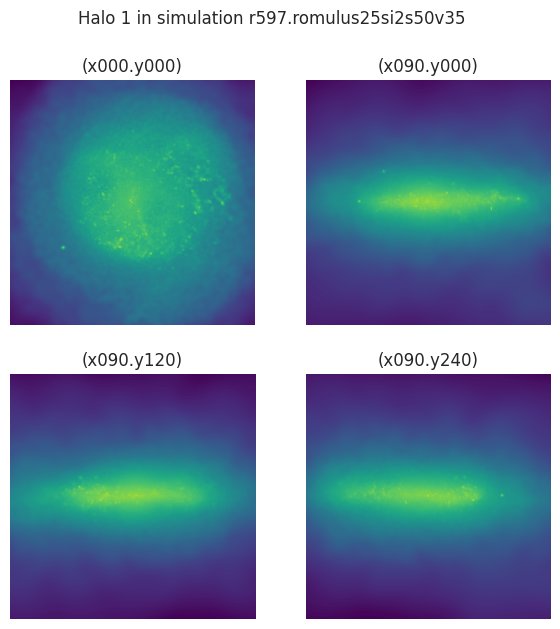

Processing simulation: r523.romulus25si2s50v35
Stellar b/a: 1.0, c/a: 0.3
jz/jcirc: 0.27, jcrit: 0.1527629792690277, dt_star: 0.00, dt_gas: 0.44, dt_total: 0.47
8.948674899845138


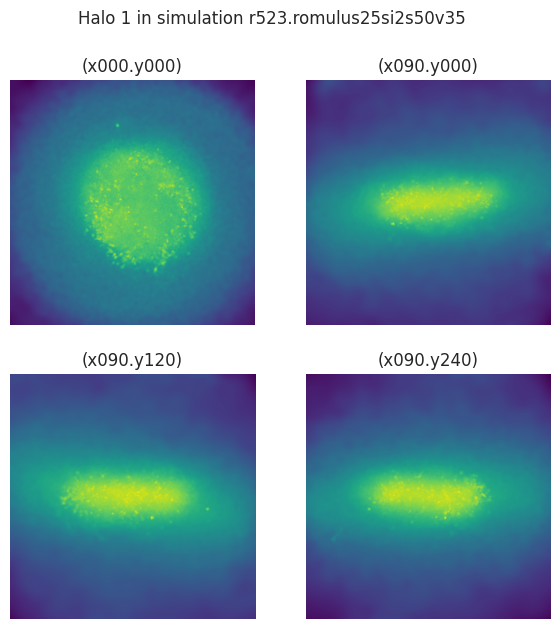

Processing simulation: r618.romulus25si2s50v35
Stellar b/a: 0.6, c/a: 0.4
jz/jcirc: 0.00, jcrit: 0.57021364569664, dt_star: 0.00, dt_gas: 0.10, dt_total: 0.09
8.628959834397866


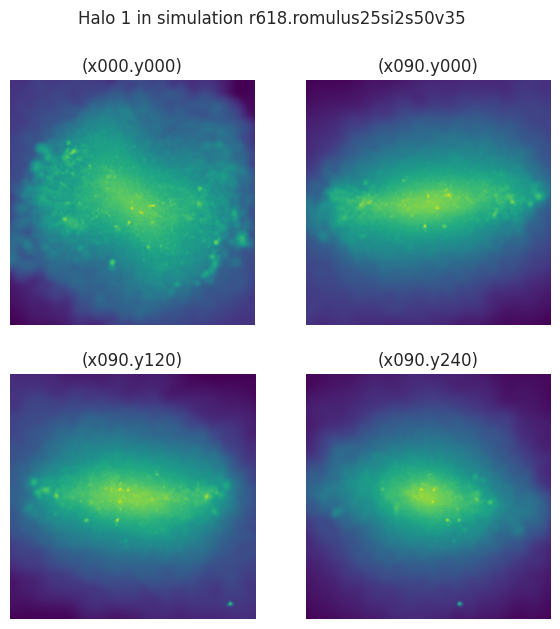

Processing simulation: r431.romulus25cvdXsec
Stellar b/a: 0.9, c/a: 0.2
jz/jcirc: 246.39, jcrit: 0.32403722405433655, dt_star: 0.54, dt_gas: 0.67, dt_total: 0.69
9.351037270602134


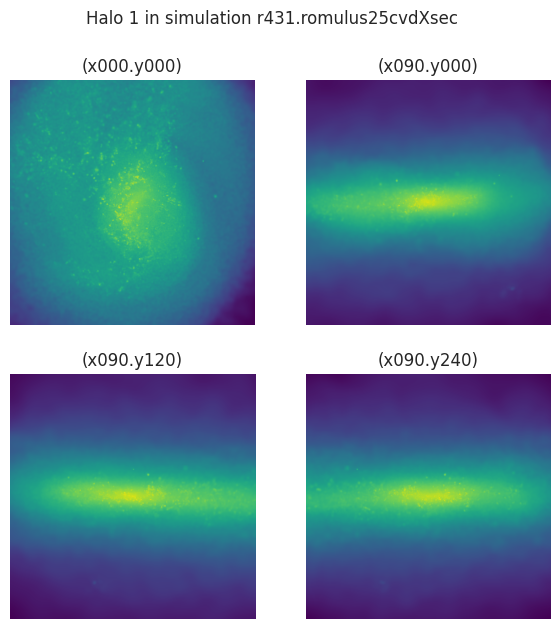

Processing simulation: r492.romulus25cvdXsec
Stellar b/a: 0.7, c/a: 0.2
jz/jcirc: 0.34, jcrit: 0.18794938921928406, dt_star: 0.09, dt_gas: 0.63, dt_total: 0.63
9.05024593041875


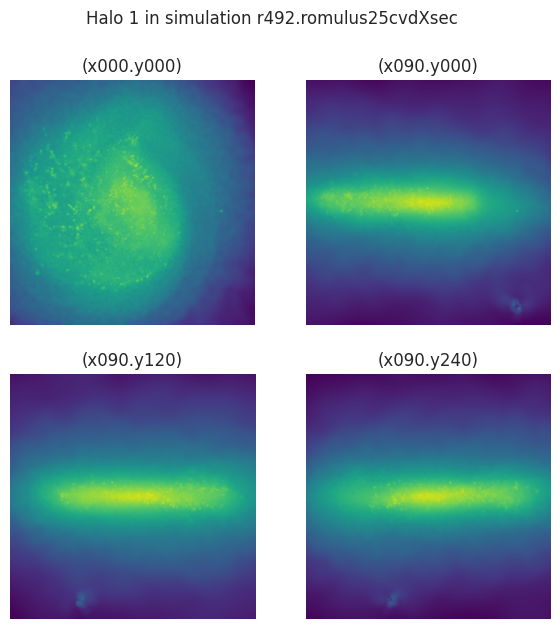

Classification complete. Results saved.


In [28]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
import traceback



import os
import pickle
import traceback
from PIL import Image
import matplotlib.pyplot as plt

#feedbacks = ['MerianSIDM', 'MerianCDM']
feedbacks = ['BWMDC', 'MerianCDM']
#feedbacks = ['MerianSIDM']
classifications = ['d', 'e', 'i']
output_folder = '../../Figures/Images/Classified'

for feedback in feedbacks:
    pickle_path = f'../PickleFiles/SimulationInfo.{feedback}.pickle'
    classified_galaxies = {}

    print(os.path.exists(pickle_path))
    print(pickle_path)
    if os.path.exists(pickle_path):
        sims = pickle.load(open(pickle_path, 'rb'))
        print(sims)
        for sim in sims:
            classified_galaxies[sim] = {}
            try:
                DMShapes = pickle.load(open(f'../../Data/{sim}.{feedback}.DMShapes.pickle', 'rb'))
                StShapes = pickle.load(open(f'../../Data/{sim}.{feedback}.3DShapes.pickle', 'rb'))
                Profiles = pickle.load(open(f'../../Data/{sim}.{feedback}.Profiles.pickle', 'rb'))
                Masses = pickle.load(open(f'../../Data/BasicData/{feedback}.Masses.pickle', 'rb'))
            except:
                print(f"Error loading shapes for simulation {sim}")
                continue
            print(f"Processing simulation: {sim}")

            for hid in sims[sim]['goodhalos']:
                fig, axs = plt.subplots(2, 2, figsize=(7, 7))
                axs = axs.flatten()
                rotations = ['x000.y000','x090.y000','x090.y120','x090.y240']
                classified_galaxies[sim][hid] = {}

                try:
                    for i, rot in enumerate(rotations):
                        img = Image.open(f'../../Figures/Images/{sim}.{feedback}/{hid}/{hid}.{rot}.png')
                        axs[i].imshow(img)
                        axs[i].set_title(f'({rot})')
                        axs[i].axis('off')

                    fig.suptitle(f'Halo {hid} in simulation {sim}')
                except:
                    print(f"Error loading image for halo {hid}")
                    print(traceback.format_exc())
                    continue

                try:
                    Reff = Profiles[str(hid)]['x000y000']['Reff']
                    ba = StShapes[(hid)]["ba_smooth"](Reff)
                    ca = StShapes[(hid)]["ca_smooth"](Reff)
                    print(f'Stellar b/a: {ba:.1f}, c/a: {ca:.1f}')
                except:
                    print(f"Error getting b/a, c/a for halo {hid}")

                try:
                    jz_jcirc_avg = Masses[sim][str(hid)]['jz_jcirc_avg']
                    j_crit = Masses[sim][str(hid)]['j_crit']
                    dt_star = Masses[sim][str(hid)]['dt_star']
                    dt_gas = Masses[sim][str(hid)]['dt_gas']
                    dt_total = Masses[sim][str(hid)]['dt_total']
                    print(f'jz/jcirc: {jz_jcirc_avg:.2f}, jcrit: {j_crit}, dt_star: {dt_star:.2f}, dt_gas: {dt_gas:.2f}, dt_total: {dt_total:.2f}')
                    print(np.log10(Masses[sim][str(hid)]['Mstar']))
                except:
                    print(f"Error getting jz/jcirc for halo {hid}")
                    print(traceback.format_exc())

                #get fraction of baryonic particles in disk


                plt.show()
                plt.pause(0.2)
                #automatic class
                user_input = None
                if -1 < jz_jcirc_avg < 1e-2:
                    user_input = 'e'
                elif .2 < jz_jcirc_avg < 1:
                    user_input = 'd'
                if np.log10(Masses[sim][str(hid)]['Mstar']) < 7.5:
                    
                    user_input = 'e'
                    classified_galaxies[sim][hid] = user_input

                #manual class
                if user_input is None:

                    while True:
                        user_input = input(f"Classify this galaxy disk,irrgular,ellipcital d/i/e or quit").lower()
                        if user_input in classifications or user_input == 'quit':
                            break
                        print(f"Invalid input. Please enter one of {', '.join(classifications)}, or 'quit'.")
                    
                    if user_input == 'quit':
                        print("Exiting early.")
                        break

                classified_galaxies[sim][hid] = user_input
                fig.suptitle(f'Halo {hid} in simulation {sim} is {user_input}')

                # Create the output folder if it doesn't exist
                os.makedirs(output_folder, exist_ok=True)

                # Save the image in the classified folder
                output_file = f'{output_folder}/{sim}.{feedback}.{hid}.{user_input}.png'
                fig.savefig(output_file)

                plt.close(fig)

            if user_input == 'quit':
                break

    # Save the classification results
    with open(f'galaxy_classifications_{feedback}.pickle', 'wb') as f:
        pickle.dump(classified_galaxies, f)

print("Classification complete. Results saved.")

# print("Final results:")
# print(disk_sims)
# results_file = f'disk_sims_results.pickle'
# # Save the final results to a pickle file
# with open(results_file, 'wb') as f:
#     pickle.dump(disk_sims, f)
#
# print(f"Results saved to {results_file}")

In [ ]:
classified_galaxied

In [ ]:
pip install getkey

In [ ]:
file = '/home/bk639/MorphologyMeasurements/Figures/Images/r431.MerianCDM/1/1.x000y000.png'
file = '/home/bk639/MorphologyMeasurements/Figures/Images/r431.MerianCDM/1/1.x000.y000.png'
#see if file exists
print(os.path.exists(file))


In [ ]:
#display results of pickle file 
import re
disks = {}
results_file = 'disk_sims_results.pickle'
with open(results_file, 'rb') as f:
    disk_sims = pickle.load(f)
    #append sim halo to list of sims, only for sims of the form rXXX or rXXXX using match string for numbers only
    for sim in disk_sims:
        if re.match(r'r\d{3,4}', sim):
            if sim not in disks:
                disks[sim] = []
            for hid in disk_sims[sim]:
                if disk_sims[sim][hid]:
                    disks[sim].append(hid)
print(disks)

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import traceback

# Function to load data
def load_data(feedback):
    with open(f'galaxy_classifications_{feedback}.pickle', 'rb') as f:
        classifications = pickle.load(f)

    with open(f'../../Data/BasicData/{feedback}.Masses.pickle', 'rb') as f:
        masses = pickle.load(f)

    return classifications, masses

# Function to handle outliers
def handle_outliers(df, jz_jcirc_min=-10, jz_jcirc_max=10):
    outliers = []

    for index, row in df.iterrows():
        if not (jz_jcirc_min <= row['jz_jcirc'] <= jz_jcirc_max):
            outliers.append({
                'feedback': row['feedback'],
                'sim': row['sim'],
                'hid': row['hid'],
                'reason': f"jz_jcirc out of range: {row['jz_jcirc']}",
                'classification': row['classification']
            })
            df.at[index, 'jz_jcirc'] = np.nan

    return df, outliers

# Function to process data
def process_data(classifications, masses, feedback, jz_jcirc_min=-10, jz_jcirc_max=10):
    data = []
    for sim in classifications:
        for hid, class_ in classifications[sim].items():
            if str(hid) in masses[sim]:
                halo_data = masses[sim][str(hid)]
                jz_jcirc = float(halo_data['jz_jcirc_avg'])

                # Combine 'e' and 'i' into 'Non-Disky'
                classification = 'Disky' if class_ == 'd' else 'Non-Disky'

                data.append({
                    'feedback': feedback,
                    'sim': sim,
                    'hid': hid,
                    'classification': classification,
                    'jz_jcirc': jz_jcirc,
                    'j_crit': halo_data['j_crit'],
                    'dt_star': halo_data['dt_star'],
                    'dt_gas': halo_data['dt_gas'],
                    'dt_total': halo_data['dt_total'],
                    #'stellar_mass': halo_data['stellar_mass'],
                    
                })

    df = pd.DataFrame(data)
    df, outliers = handle_outliers(df, jz_jcirc_min, jz_jcirc_max)
    return df, outliers

# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

def create_plot(df, y_column, output_filename):
    #clear previous plot
    plt.close()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

    #matplotlib defualts


    labels = ['Disky', 'Non-Disky']
    colors = ['blue', 'black']

    bin_edges = np.logspace(-2.5, 0, 10)
    #print(bin_edges)
    
    #count any data points with jz_jcirc < 10^-3 to 10^-3
    print('Number of data points with jz_jcirc < 10^-2.5')
    print(df[df['jz_jcirc'] < 10**-2.5][y_column].count())
    

    # Get absolute value of jz_jcirc
    df['jz_jcirc'] = df['jz_jcirc'].abs()

    for label, color in zip(labels, colors):
        #print(color, label)
        #print(df[df['classification'] == label][y_column])

        ax.hist(df[df['classification'] == label][y_column],
                bins=bin_edges,
                color=color,
                edgecolor=color,
                linewidth=3,
                label=label,
                density=False,
                histtype='step')

    ax.set_xlabel(r'$J_z \,/\, J_{circ}$', fontsize=33)
    ax.set_ylabel('Number', fontsize=33) 
    ax.set_xscale('log')

    #increase size of tick labels
    ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)
    #increase size of subticks
    ax.tick_params(axis='both', which='minor', labelsize=5, width=1.5, length=6)
    ax.legend(fontsize=16)

    plt.tight_layout()
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()


# Main execution
feedbacks = ['BWMDC', 'MerianCDM']

# Adjustable parameters for outlier removal
JZ_JCIRC_MIN = -10
JZ_JCIRC_MAX = 10

# Adjustable y-axis limit
y_limit = (-0.1, 0.5)

all_data = []
all_outliers = []

for feedback in feedbacks:
    print(f"Processing {feedback}...")
    classifications, masses = load_data(feedback)
    df, outliers = process_data(classifications, masses, feedback, JZ_JCIRC_MIN, JZ_JCIRC_MAX)

    all_data.append(df)
    all_outliers.extend(outliers)

    print(f"Data summary for {feedback}:")
    print(df.describe())

df = pd.concat(all_data, ignore_index=True)

df['jz_jcirc/j_crit'] = (df['jz_jcirc'] / df['j_crit'])

create_plot(df, 'jz_jcirc', f'/home/bk639/OverLeaf/ShapePaper/figures/jz_jcirc.png')
print("Combined plot saved.")

print("\nOutliers:")
for outlier in all_outliers:
    print(f"Feedback: {outlier['feedback']}, Simulation: {outlier['sim']}, Halo ID: {outlier['hid']}, Reason: {outlier['reason']}, classification: {outlier['classification']}")

print("Plot created successfully.")

In [ ]:
import re
from tangos.input_handlers import finding


# examples strs 1023.romulus25.3072g1HsbBH.000076  r1023.romulus25.3072g1HsbBH.001056
test_str = 'r1023.romulus25.3072g1HsbBH.000096/ahf_200/r1023.romulus25.3072g1HsbBH.000096'

snapshot_pattern = ['/*.00[0-9][0-9][0-9][0-9]']
#snapshot_pattern = ['*']
exclude_pattern = ['*.startrun', 'tipsy.info', '*.AHF*','*.parameter','*ahf_200*']
#exclude_pattern = []
base = '/data/REPOSITORY/romulus_zooms/r1023.romulus25.3072g1HsbBH'
results = sorted(finding.find(basename=base + "/", patterns=snapshot_pattern, ignore=exclude_pattern))

print(results)
print(len(results))

#if snapshot_pattern.match(test_str) and not exclude_pattern.match(test_str):
    #print('Matched')


r634
Processing simulation: r634.romulus25si2s50v35
SIDM Stellar b/a: 0.83, c/a: 0.41
CDM Stellar b/a: 0.96, c/a: 0.25
Difference b/a: -0.13, c/a: 0.16
SIDM jz/jcirc: 0.13, jcrit: 0.38, dt_star: 0.04, dt_gas: 0.48, dt_total: 0.46
CDM jz/jcirc: 0.21, jcrit: 0.39, dt_star: 0.09, dt_gas: 0.58, dt_total: 0.56
Difference jz/jcirc: -0.08, jcrit: -0.01, dt_star: -0.05, dt_gas: -0.10, dt_total: -0.10


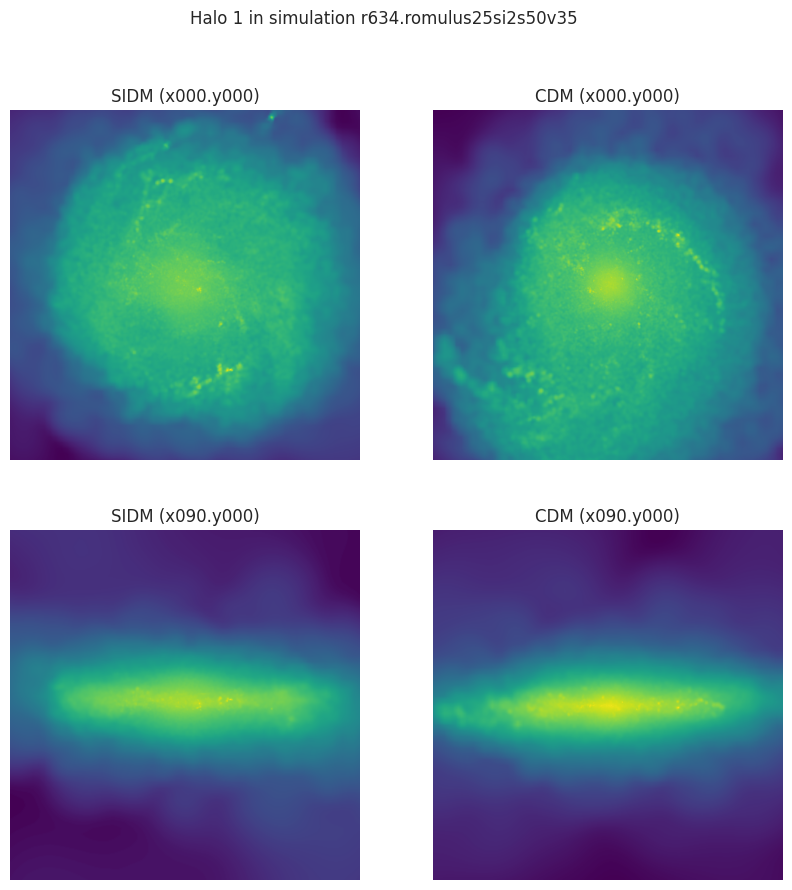

r492
Processing simulation: r492.romulus25si2s50v35
SIDM Stellar b/a: 0.92, c/a: 0.23
CDM Stellar b/a: 0.70, c/a: 0.21
Difference b/a: 0.22, c/a: 0.02
SIDM jz/jcirc: 0.24, jcrit: 0.14, dt_star: 0.00, dt_gas: 0.63, dt_total: 0.62
CDM jz/jcirc: 0.30, jcrit: 0.21, dt_star: 0.06, dt_gas: 0.62, dt_total: 0.61
Difference jz/jcirc: -0.06, jcrit: -0.07, dt_star: -0.06, dt_gas: 0.01, dt_total: 0.01


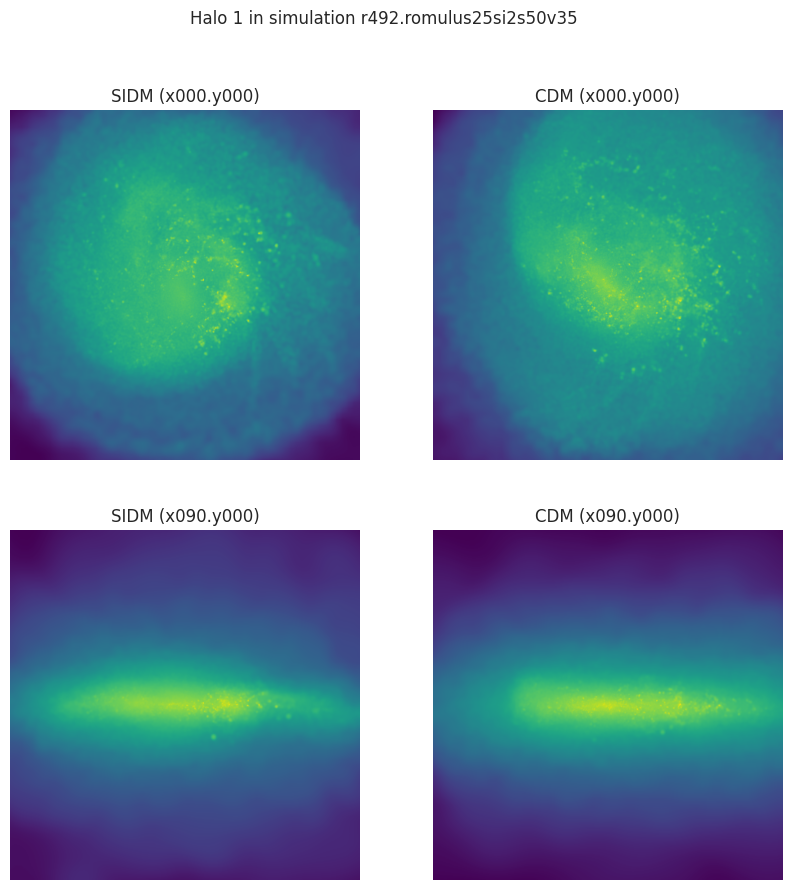

r468
Processing simulation: r468.romulus25si2s50v35
SIDM Stellar b/a: 0.85, c/a: 0.46
CDM Stellar b/a: 0.73, c/a: 0.43
Difference b/a: 0.12, c/a: 0.03
SIDM jz/jcirc: 0.12, jcrit: 0.36, dt_star: 0.01, dt_gas: 0.08, dt_total: 0.10
CDM jz/jcirc: 0.08, jcrit: 0.36, dt_star: 0.01, dt_gas: 0.13, dt_total: 0.12
Difference jz/jcirc: 0.04, jcrit: 0.00, dt_star: -0.00, dt_gas: -0.06, dt_total: -0.02


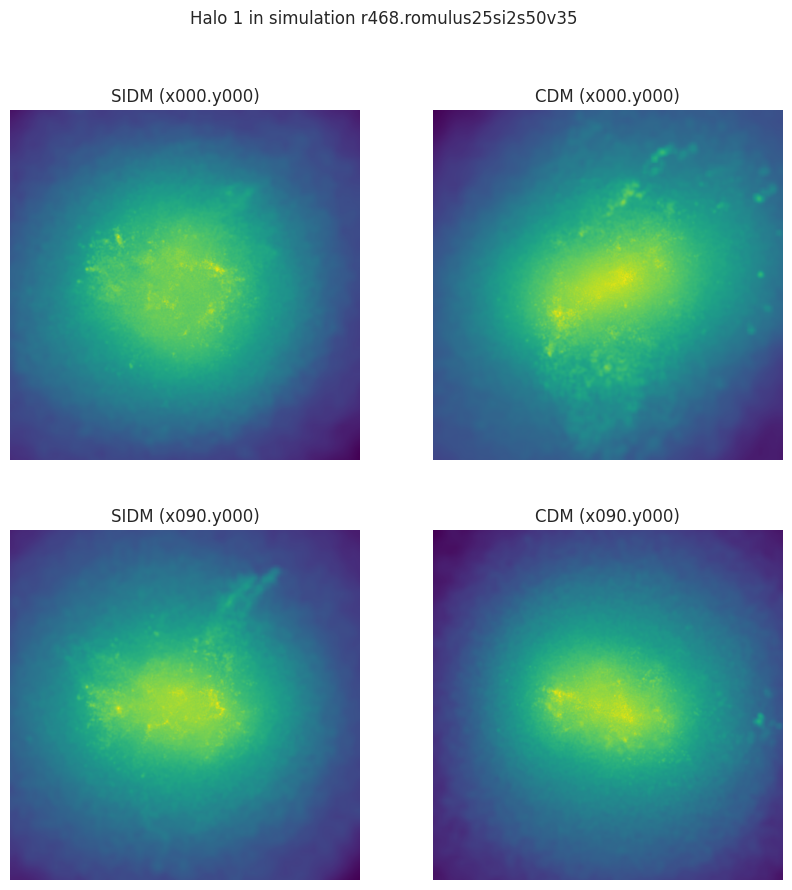

r488
Processing simulation: r488.romulus25si2s50v35
SIDM Stellar b/a: 0.74, c/a: 0.41
CDM Stellar b/a: 0.61, c/a: 0.52
Difference b/a: 0.14, c/a: -0.11
SIDM jz/jcirc: 0.25, jcrit: 0.26, dt_star: 0.03, dt_gas: 0.44, dt_total: 0.44
CDM jz/jcirc: -0.00, jcrit: 0.70, dt_star: 0.00, dt_gas: 0.00, dt_total: 0.00
Difference jz/jcirc: 0.25, jcrit: -0.44, dt_star: 0.03, dt_gas: 0.44, dt_total: 0.44


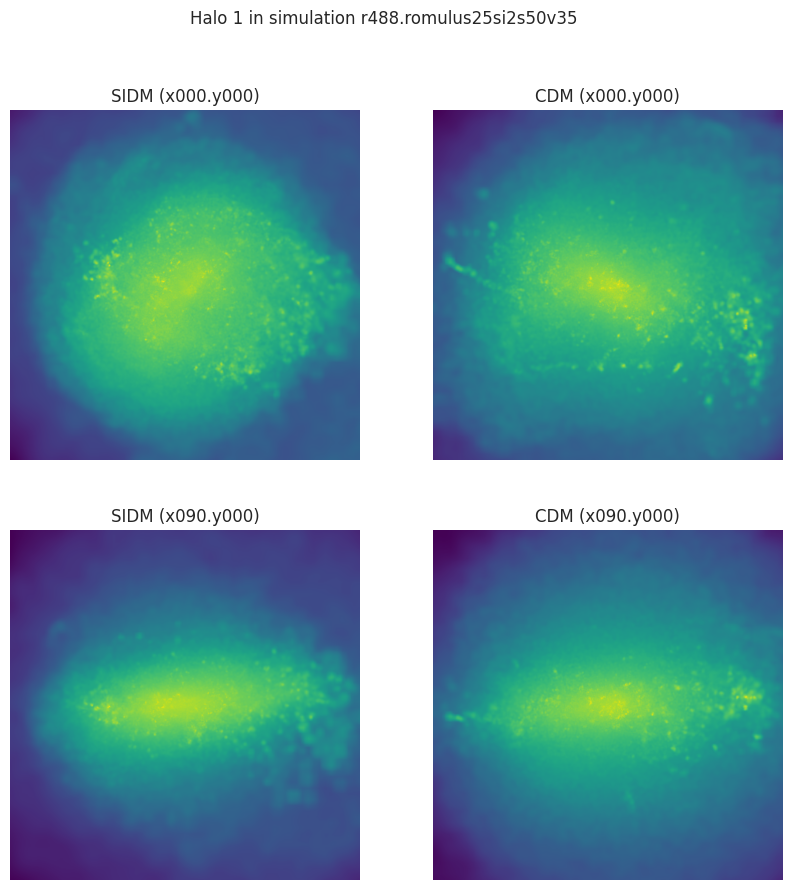

r544
Processing simulation: r544.romulus25si2s50v35
SIDM Stellar b/a: 0.65, c/a: 0.20
CDM Stellar b/a: 0.89, c/a: 0.22
Difference b/a: -0.24, c/a: -0.02
SIDM jz/jcirc: 0.34, jcrit: 0.20, dt_star: 0.09, dt_gas: 0.51, dt_total: 0.53
CDM jz/jcirc: 0.33, jcrit: 0.15, dt_star: 0.00, dt_gas: 0.55, dt_total: 0.58
Difference jz/jcirc: 0.01, jcrit: 0.05, dt_star: 0.08, dt_gas: -0.04, dt_total: -0.05


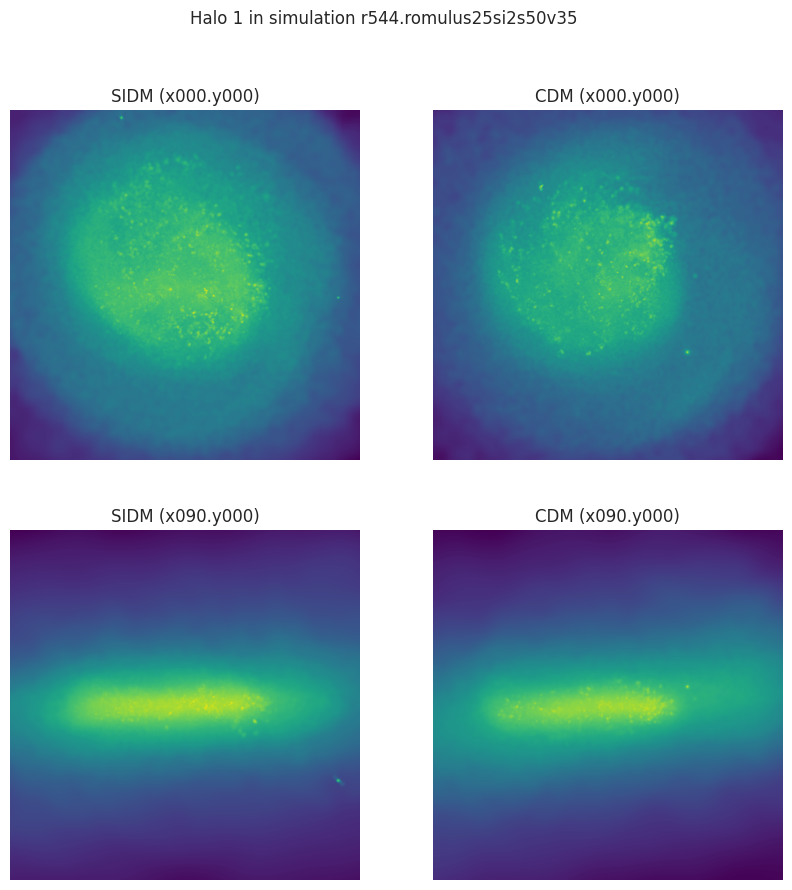

r597
Processing simulation: r597.romulus25si2s50v35
SIDM Stellar b/a: 0.73, c/a: 0.29
CDM Stellar b/a: 0.85, c/a: 0.25
Difference b/a: -0.12, c/a: 0.04
SIDM jz/jcirc: 0.19, jcrit: 0.41, dt_star: 0.11, dt_gas: 0.43, dt_total: 0.41
CDM jz/jcirc: 0.32, jcrit: 0.26, dt_star: 0.08, dt_gas: 0.50, dt_total: 0.51
Difference jz/jcirc: -0.13, jcrit: 0.14, dt_star: 0.02, dt_gas: -0.07, dt_total: -0.10


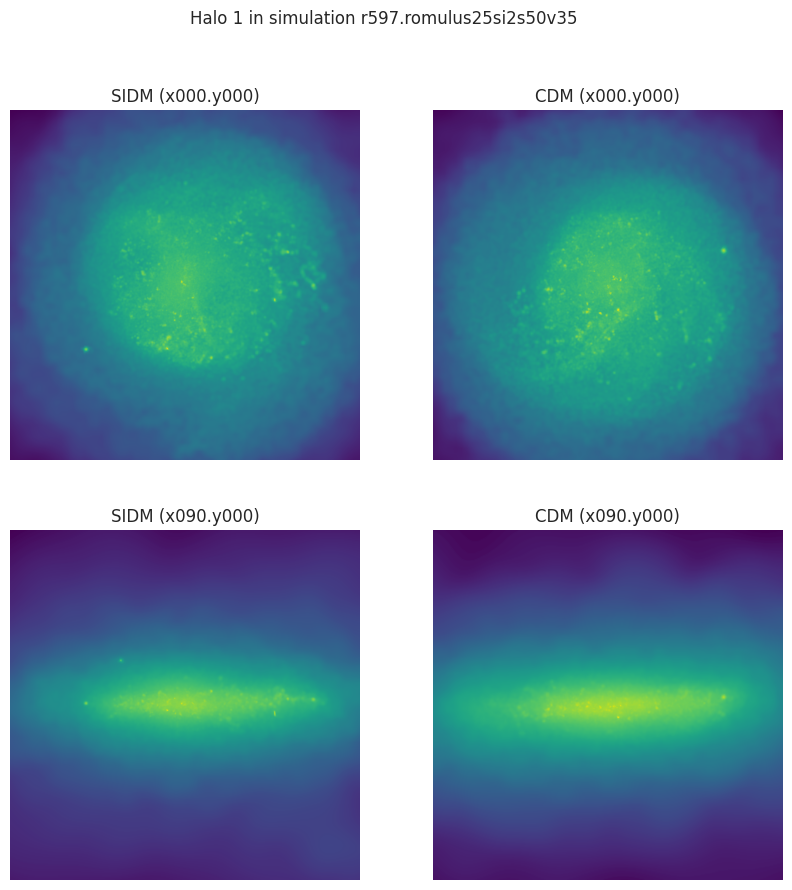

r523
Processing simulation: r523.romulus25si2s50v35
SIDM Stellar b/a: 0.96, c/a: 0.27
CDM Stellar b/a: 0.85, c/a: 0.29
Difference b/a: 0.11, c/a: -0.02
SIDM jz/jcirc: 0.27, jcrit: 0.15, dt_star: 0.00, dt_gas: 0.44, dt_total: 0.47
CDM jz/jcirc: 0.34, jcrit: 0.16, dt_star: 0.13, dt_gas: 0.42, dt_total: 0.45
Difference jz/jcirc: -0.07, jcrit: -0.01, dt_star: -0.13, dt_gas: 0.02, dt_total: 0.02


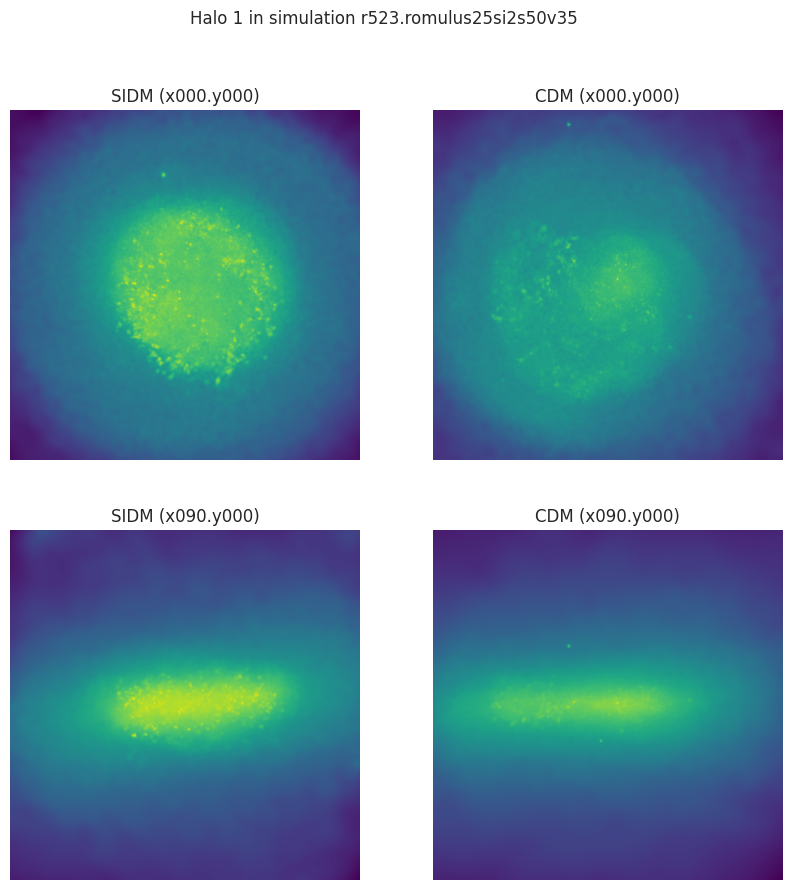

r618
Processing simulation: r618.romulus25si2s50v35
SIDM Stellar b/a: 0.56, c/a: 0.42
CDM Stellar b/a: 0.51, c/a: 0.44
Difference b/a: 0.06, c/a: -0.02
SIDM jz/jcirc: 0.00, jcrit: 0.57, dt_star: 0.00, dt_gas: 0.10, dt_total: 0.09
CDM jz/jcirc: 0.01, jcrit: 0.28, dt_star: 0.00, dt_gas: 0.11, dt_total: 0.10
Difference jz/jcirc: -0.01, jcrit: 0.29, dt_star: 0.00, dt_gas: -0.01, dt_total: -0.01


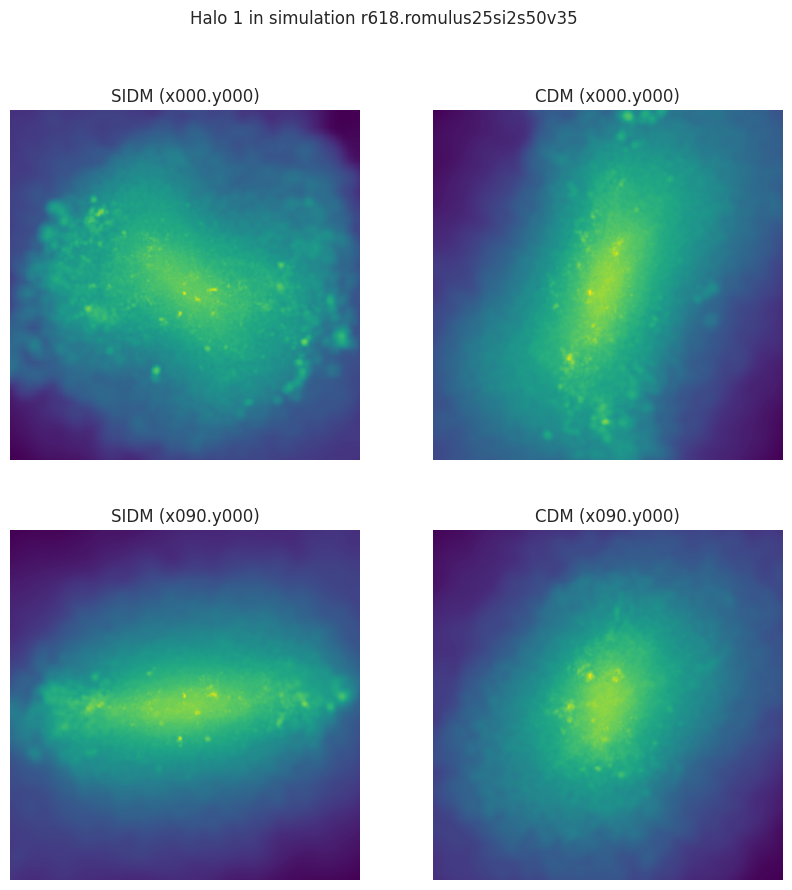

r431
Processing simulation: r431.romulus25cvdXsec
SIDM Stellar b/a: 0.86, c/a: 0.23
CDM Stellar b/a: 0.94, c/a: 0.20
Difference b/a: -0.08, c/a: 0.03
SIDM jz/jcirc: 246.39, jcrit: 0.32, dt_star: 0.54, dt_gas: 0.67, dt_total: 0.69
CDM jz/jcirc: 0.52, jcrit: 0.34, dt_star: 0.46, dt_gas: 0.80, dt_total: 0.79
Difference jz/jcirc: 245.87, jcrit: -0.02, dt_star: 0.08, dt_gas: -0.13, dt_total: -0.10


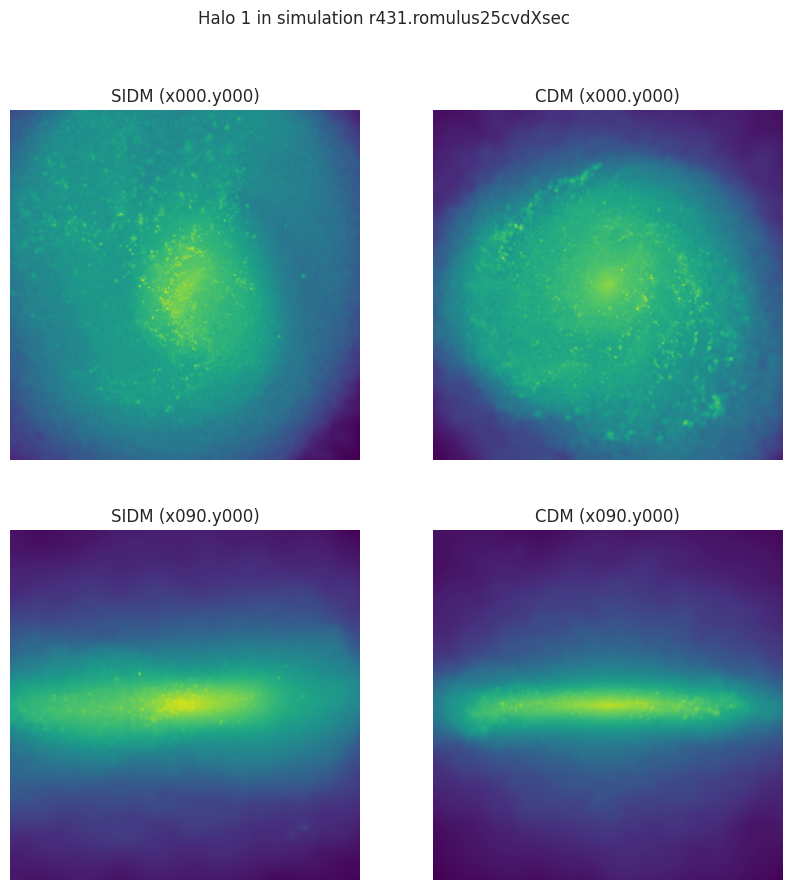

r492
Processing simulation: r492.romulus25cvdXsec
SIDM Stellar b/a: 0.65, c/a: 0.21
CDM Stellar b/a: 0.70, c/a: 0.21
Difference b/a: -0.05, c/a: -0.01
SIDM jz/jcirc: 0.34, jcrit: 0.19, dt_star: 0.09, dt_gas: 0.63, dt_total: 0.63
CDM jz/jcirc: 0.30, jcrit: 0.21, dt_star: 0.06, dt_gas: 0.62, dt_total: 0.61
Difference jz/jcirc: 0.04, jcrit: -0.02, dt_star: 0.03, dt_gas: 0.01, dt_total: 0.02


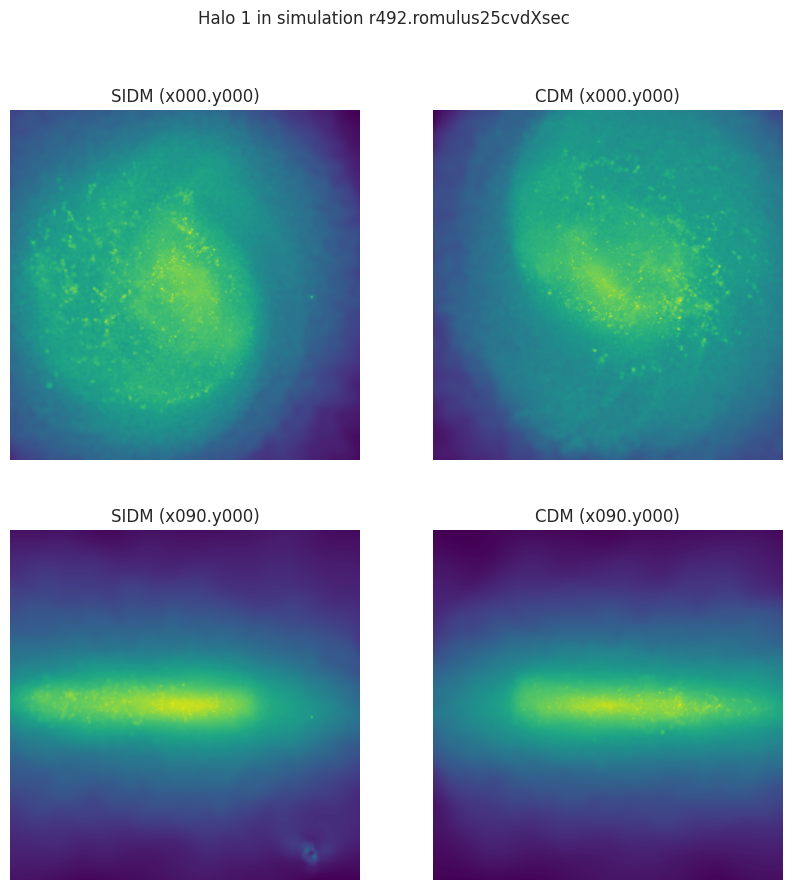

Classification complete. Results saved.


In [19]:
import os
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import traceback
import numpy as np

def extract_number(sim_name):
    return sim_name.split('.')[0][1:]

feedbacks = ['MerianSIDM', 'MerianCDM']
classifications = ['d', 'e', 'i']
output_folder = '../../Figures/Images/Classified'

# Load SIDM simulations
sidm_pickle_path = f'../PickleFiles/SimulationInfo.MerianSIDM.pickle'
cdm_pickle_path = f'../PickleFiles/SimulationInfo.MerianCDM.pickle'

classified_galaxies = {}

if os.path.exists(sidm_pickle_path) and os.path.exists(cdm_pickle_path):
    sidm_sims = pickle.load(open(sidm_pickle_path, 'rb'))
    cdm_sims = pickle.load(open(cdm_pickle_path, 'rb'))
    for sim in sidm_sims:
        try:
            sidm_dmshapes = pickle.load(open(f'../../Data/{sim}.MerianSIDM.DMShapes.pickle', 'rb'))
            sidm_stshapes = pickle.load(open(f'../../Data/{sim}.MerianSIDM.3DShapes.pickle', 'rb'))
            sidm_profiles = pickle.load(open(f'../../Data/{sim}.MerianSIDM.Profiles.pickle', 'rb'))
            sidm_masses = pickle.load(open(f'../../Data/BasicData/MerianSIDM.Masses.pickle', 'rb'))
            #extract number from sim name
            sim_number = extract_number(sim)
            CDM = f'r{sim_number}'
            print(CDM)

            cdm_dmshapes = pickle.load(open(f'../../Data/{CDM}.MerianCDM.DMShapes.pickle', 'rb'))
            cdm_stshapes = pickle.load(open(f'../../Data/{CDM}.MerianCDM.3DShapes.pickle', 'rb'))
            cdm_profiles = pickle.load(open(f'../../Data/{CDM}.MerianCDM.Profiles.pickle', 'rb'))
            cdm_masses = pickle.load(open(f'../../Data/BasicData/MerianCDM.Masses.pickle', 'rb'))
        except:
            print(f"Error loading shapes for simulation {sim}")
            print(traceback.format_exc())
            continue

        print(f"Processing simulation: {sim}")

        for hid in sidm_sims[sim]['goodhalos']:
            if hid not in cdm_sims[CDM]['goodhalos']:
                print(f"Halo {hid} not found in CDM simulation, skipping.")
                continue

            fig, axs = plt.subplots(2, 2, figsize=(10, 10))
            rotations = ['x000.y000', 'x090.y000']

            try:
                for i, rot in enumerate(rotations):
                    sidm_img = Image.open(f'../../Figures/Images/{sim}.MerianSIDM/{hid}/{hid}.{rot}.png')
                    cdm_img = Image.open(f'../../Figures/Images/{CDM}.MerianCDM/{hid}/{hid}.{rot}.png')
                    axs[i, 0].imshow(sidm_img)
                    axs[i, 0].set_title(f'SIDM ({rot})')
                    axs[i, 0].axis('off')
                    axs[i, 1].imshow(cdm_img)
                    axs[i, 1].set_title(f'CDM ({rot})')
                    axs[i, 1].axis('off')

                fig.suptitle(f'Halo {hid} in simulation {sim}')
            except:
                print(f"Error loading image for halo {hid}")
                print(traceback.format_exc())
                continue

            try:
                sidm_reff = sidm_profiles[str(hid)]['x000y000']['Reff']
                sidm_ba = sidm_stshapes[(hid)]["ba_smooth"](sidm_reff)
                sidm_ca = sidm_stshapes[(hid)]["ca_smooth"](sidm_reff)

                cdm_reff = cdm_profiles[str(hid)]['x000y000']['Reff']
                cdm_ba = cdm_stshapes[(hid)]["ba_smooth"](cdm_reff)
                cdm_ca = cdm_stshapes[(hid)]["ca_smooth"](cdm_reff)

                print(f'SIDM Stellar b/a: {sidm_ba:.2f}, c/a: {sidm_ca:.2f}')
                print(f'CDM Stellar b/a: {cdm_ba:.2f}, c/a: {cdm_ca:.2f}')
                print(f'Difference b/a: {sidm_ba - cdm_ba:.2f}, c/a: {sidm_ca - cdm_ca:.2f}')
            except:
                print(f"Error getting b/a, c/a for halo {hid}")
                print(traceback.format_exc())
            #print('Masses')
            #print(sidm_masses)
            try:
                sidm_jz_jcirc_avg = sidm_masses[sim][str(hid)]['jz_jcirc_avg']
                sidm_j_crit = sidm_masses[sim][str(hid)]['j_crit']
                sidm_dt_star = sidm_masses[sim][str(hid)]['dt_star']
                sidm_dt_gas = sidm_masses[sim][str(hid)]['dt_gas']
                sidm_dt_total = sidm_masses[sim][str(hid)]['dt_total']

                cdm_jz_jcirc_avg = cdm_masses[CDM][str(hid)]['jz_jcirc_avg']
                cdm_j_crit = cdm_masses[CDM][str(hid)]['j_crit']
                cdm_dt_star = cdm_masses[CDM][str(hid)]['dt_star']
                cdm_dt_gas = cdm_masses[CDM][str(hid)]['dt_gas']
                cdm_dt_total = cdm_masses[CDM][str(hid)]['dt_total']

                print(f'SIDM jz/jcirc: {sidm_jz_jcirc_avg:.2f}, jcrit: {sidm_j_crit:.2f}, dt_star: {sidm_dt_star:.2f}, dt_gas: {sidm_dt_gas:.2f}, dt_total: {sidm_dt_total:.2f}')
                print(f'CDM jz/jcirc: {cdm_jz_jcirc_avg:.2f}, jcrit: {cdm_j_crit:.2f}, dt_star: {cdm_dt_star:.2f}, dt_gas: {cdm_dt_gas:.2f}, dt_total: {cdm_dt_total:.2f}')
                print(f'Difference jz/jcirc: {sidm_jz_jcirc_avg - cdm_jz_jcirc_avg:.2f}, jcrit: {sidm_j_crit - cdm_j_crit:.2f}, dt_star: {sidm_dt_star - cdm_dt_star:.2f}, dt_gas: {sidm_dt_gas - cdm_dt_gas:.2f}, dt_total: {sidm_dt_total - cdm_dt_total:.2f}')
            except:
                print(f"Error getting jz/jcirc for halo {hid}")
                print(traceback.format_exc())

            plt.show()
            plt.pause(0.2)

            #fig.suptitle(f'Halo {hid} in simulation {sim} is {user_input}')

            # Create the output folder if it doesn't exist
            os.makedirs(output_folder, exist_ok=True)

            # Save the image in the classified folder
            #output_file = f'{output_folder}/{sim}.SIDM_CDM_comparison.{hid}.{user_input}.png'
            #fig.savefig(output_file)


    print("Classification complete. Results saved.")
else:
    print("Error: One or both pickle files not found.")

In [12]:
#does file ../../Data/r492.romulus25cvdXsec.MerianCDM.DMShapes.pickle exist
import os
import pickle
import traceback

try:
    DMShapes = pickle.load(open(f'../../Data/r492.romulus25cvdXsec.MerianCDM.DMShapes.pickle', 'rb'))
    print(DMShapes)
except:
    print(f"Error loading shapes for simulation {sim}")
    print(traceback.format_exc())

Error loading shapes for simulation r492.romulus25cvdXsec
Traceback (most recent call last):
  File "/tmp/ipykernel_1518703/1123723498.py", line 7, in <module>
    DMShapes = pickle.load(open(f'../../Data/r492.romulus25cvdXsec.MerianCDM.DMShapes.pickle', 'rb'))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 324, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '../../Data/r492.romulus25cvdXsec.MerianCDM.DMShapes.pickle'

